In [1]:
import copy
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm, Normalize
from IPython.display import clear_output
# settings
# plt.style.use("fivethirtyeight")

try:
    import PyBlastAfterglowMag as PBA
except:
    raise ImportError("Cannot import PyBlastAfterglowMag")
try:
    import afterglowpy as grb
except:
    afterglowpy = False
    print("Error! could not import afteglowpy")

from grbafg.tools import *
from settings import SettingsTopHat

curdir = os.getcwd() + '/'

figs = os.getcwd()+"/figs/"
out = os.getcwd()+"/out/"
pdfs = "/home/vsevolod/Work/GIT/overleaf/grb_model_paper/figs/"

In [2]:
df_structure = pd.DataFrame.from_dict(SettingsTopHat.structure,orient='index').T
df_structure["Eiso_c"] = df_structure["Eiso_c"].astype(float)
df_pars = pd.DataFrame.from_dict(SettingsTopHat.pars)
display(df_structure.head())
display(df_pars.head())

,struct,Eiso_c,Gamma0c,M0c,theta_c,theta_w,nlayers_pw,nlayers_a
0,tophat,1.000000e+53,1000.0,-1.0,0.1,0.1,150,1


,skymap_times,obs_freq,s,n_ism,eps_e_fs,d_l,eps_b_fs,z,p_fs,theta_obs,nsublayers
0,1.0,3.000000e+09,0,10.0,0.1,3.090000e+26,0.01,0.028,2.2,1.57,1
1,10.0,3.000000e+09,0,10.0,0.1,3.090000e+26,0.01,0.028,2.2,1.57,1
2,40.0,3.000000e+09,0,10.0,0.1,3.090000e+26,0.01,0.028,2.2,1.57,1
3,100.0,3.000000e+09,0,10.0,0.1,3.090000e+26,0.01,0.028,2.2,1.57,1
4,200.0,3.000000e+09,0,10.0,0.1,3.090000e+26,0.01,0.028,2.2,1.57,1


In [3]:
grbrs = CasesFSRS(default_parfile_fpath=curdir+"parfile_def.par", workingdir=curdir+"output/")

# Energy Analysis

E0 = 2.497917360987117e+49, M0 = 9.29534411946362e+25, Rd = 3531769312796997.0 n_ism=1.0, Gamma0 = 300.0, theta0 = 0.1


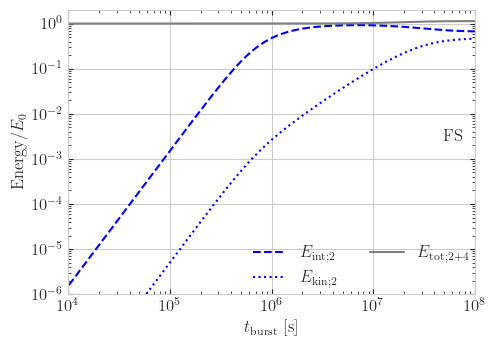

In [5]:
def paper_plot_compare_fsrs(plot_rs=False,figname = "abstract_tophat_fs_energy", text="FS \& RS", ylim=()):

    def gamma_adi(Gamma, beta):
        """ Adiabatic index of the fluid From Nava 2013 paper """
        return (4. + 1. / Gamma) / 3.

    def GammaEff(Gamma, gammaAdi):
        return (gammaAdi * Gamma ** 2. - gammaAdi + 1.) / Gamma
    
    tsk = copy.deepcopy( SettingsTopHat() )


    # ---------------------------------------------
    bb = Base(default_parfile_fpath=curdir+"parfile_def.par", workingdir=curdir+"output/")
    # 
    # opts_ = copy.deepcopy(tsk.opts_grb)
    # opts_["bw_type"] = "fs"
    # opts_["do_rs"] = "no"
    # opts_["fname_dyn"] = f"dyn_a_fs.h5"
    # opts_["fname_sky_map"] = f"skymap_a_fs.h5"
    # opts_["fname_light_curve"] = f"lc_a_fs.h5"
    # opts_["fname_light_curve_layers"] = f"lc_a_fs_layers.h5"
    # pba_ = bb.run_a(struct=tsk.structure, pars=tsk.pars_fsrs, opts={}, opts_grb=opts_)
    # 
    
    if plot_rs:
        pars = copy.deepcopy(tsk.pars_fsrs)
        pars["n_ism"] = 1.0
        pars["theta_obs"] = 0.0
        tsk.structure["Eiso_c"] = 1e52
        tsk.structure["Gamma0c"] = 300.
        opts_ = copy.deepcopy(tsk.opts_fsrs)
        opts_["bw_type"] = "fsrs"
        opts_["do_rs"] = "yes"
        opts_["fname_dyn"] = f"dyn_a_fsrs.h5"
        opts_["fname_sky_map"] = f"skymap_a_fsrs.h5"
        opts_["fname_light_curve"] = f"lc_a_fsrs.h5"
        opts_["fname_light_curve_layers"] = f"lc_a_fsrs_layers.h5"
        opts_["method_spread"] = f"None"
    else:
        pars = copy.deepcopy(tsk.pars)
        pars["n_ism"] = 1.0
        pars["theta_obs"] = 0.0
        tsk.structure["Eiso_c"] = 1e52
        tsk.structure["Gamma0c"] = 300.
        opts_ = copy.deepcopy(tsk.opts_a)
        opts_["bw_type"] = "fs"
        opts_["do_rs"] = "no"
        opts_["fname_dyn"] = f"dyn_a_fs.h5"
        opts_["fname_sky_map"] = f"skymap_a_fs.h5"
        opts_["fname_light_curve"] = f"lc_a_fs.h5"
        opts_["fname_light_curve_layers"] = f"lc_a_fs_layers.h5"
        opts_["method_spread"] = f"None"
    
    pba_a = bb.run_a(struct=tsk.structure, pars=pars, opts={}, opts_grb=opts_)
    
    clear_output(wait=False)

    E0 = float(pba_a.GRB.get_dyn_obj()["shell=0 layer=0"].attrs["E0"])
    M0 = float(pba_a.GRB.get_dyn_obj()["shell=0 layer=0"].attrs["M0"])
    Rd = float(pba_a.GRB.get_dyn_obj()["shell=0 layer=0"].attrs["Rd"])
    Gamma0 = float(pba_a.GRB.get_dyn_obj()["shell=0 layer=0"].attrs["Gamma0"])
    theta_b0 = float(pba_a.GRB.get_dyn_obj()["shell=0 layer=0"].attrs["theta_b0"])
    print(f"E0 = {E0}, M0 = {M0}, Rd = {Rd} n_ism={pars['n_ism']}, Gamma0 = {Gamma0}, theta0 = {theta_b0}")
    
    R = pba_a.GRB.get_dyn_arr(v_n="R",ishell=0,ilayer=0)
    Gamma = pba_a.GRB.get_dyn_arr(v_n="Gamma",ishell=0,ilayer=0)
    beta = pba_a.GRB.get_dyn_arr(v_n="beta",ishell=0,ilayer=0)
    Eint2 = pba_a.GRB.get_dyn_arr(v_n="Eint2",ishell=0,ilayer=0)
    M2 = pba_a.GRB.get_dyn_arr(v_n="M2",ishell=0,ilayer=0)
    tburst = pba_a.GRB.get_dyn_arr(v_n="tburst",ishell=0,ilayer=0)
    gamAdi = gamma_adi(Gamma, beta)
    GammaEff2 = GammaEff(Gamma, gamAdi)
    
    Ekin4 = (Gamma - 1) * cgs.c ** 2 * M0
    Ekin2 = (Gamma - 1) * cgs.c ** 2 * M2
    Eint2 *= GammaEff2
    # Etot2 = Ekin2 + Eint2 + Ekin4

    fig, axes = plt.subplots(figsize=(5,3.5), ncols=1, nrows=1, sharex="all")
    axes = [axes]
    # bb.plot_dyn(axes[0], pba=pba_a, v_n_x="tburst", v_n_y="Gamma", layers=(),
    #             plot_layer={"ls":'-', "cmap":"Reds", "alpha":1, "vmin":-50, "vmax":60})
    # bb.plot_dyn(axes[1], pba=pba_a, v_n_x="tburst", v_n_y="R", layers=(),
    #             plot_layer={"ls":'-', "cmap":"Reds", "alpha":1, "vmin":-50, "vmax":60})
    # bb.plot_dyn(axes[2], pba=pba_a, v_n_x="tburst", v_n_y="M3", layers=(),
    #             plot_layer={"ls":'-', "cmap":"Reds", "alpha":1, "vmin":-50, "vmax":60})

    # ax.grid()
    # ax.legend()
    for ax in axes:
        ax.set_xscale("log")
        ax.set_yscale("log")
        ax.tick_params(axis='both', which='both', labelleft=True,
                       labelright=False, tick1On=True, tick2On=True,
                       labelsize=12,
                       direction='in',
                       bottom=True, top=True, left=True, right=True)
        # ax.xaxis.set_tick_params(labelbottom=False)
        ax.minorticks_on()
        ax.set_xlabel(r"$t_{\rm burst}$ [s]", fontsize=12)
        # ax.set_xlim(1e4,1e10)

    axes[0].set_ylabel(r"Energy/$E_0$", fontsize=12)
    # axes[1].set_ylabel(r"$R$", fontsize=12)
    axes[0].set_xlim(1e4,1e8)
    # axes[1].set_ylim(1e14,1e20)

    # axes[0].plot(tburst, Gamma, label=r"$E_{\rm tot; 2+3}$", color='blue')
    # axes[0].plot(tburst, Gamma43, label=r"$E_{\rm tot; 2+3}$", color='green')

    # axes[1].plot(tburst, M2, label=r"$E_{\rm tot; 2+3}$", color='blue')
    # axes[1].plot(tburst, M3, label=r"$E_{\rm tot; 2+3}$", color='green')

   
    # axes[0].plot(tburst, Etot2/E0, label=r"$E_{\rm tot; 2}$", color='blue')
    axes[0].plot(tburst, Eint2/E0, label=r"$E_{\rm int; 2}$", color='blue', ls='--')
    axes[0].plot(tburst, Ekin2/E0, label=r"$E_{\rm kin; 2}$", color='blue', ls=':')
    if (opts_["do_rs"] == "yes"):
        Gamma43 = pba_a.GRB.get_dyn_arr(v_n="Gamma43",ishell=0,ilayer=0)
        Eint3 = pba_a.GRB.get_dyn_arr(v_n="Eint3",ishell=0,ilayer=0)
        M3 = pba_a.GRB.get_dyn_arr(v_n="M3",ishell=0,ilayer=0)

        
        gamAdi3 = gamma_adi(Gamma43, Gamma43)
        GammaEff3 = GammaEff(Gamma43, gamAdi3)
        GammaEff3[~np.isfinite(GammaEff3)] = 0.
        Ekin4 = (Gamma - 1) * (M0 - M3) * cgs.c ** 2
        Eint3 *= GammaEff3
        Ekin3 = (Gamma43 - 1.0) * cgs.c ** 2 * M3
        # Etot3 = Ekin3 + Eint3
        
        # axes[0].plot(tburst, Etot3/E0, label=r"$E_{\rm tot; 3}$", color='green')
        axes[0].plot(tburst, Eint3/E0, label=r"$E_{\rm int; 3}$", color='green', ls="--")
        axes[0].plot(tburst, Ekin3/E0, label=r"$E_{\rm kin; 3}$", color='green', ls=":")
    
    if (opts_["do_rs"] == "yes"):
        axes[0].plot(tburst, (Ekin2 + Eint2 + Ekin4 + Ekin3 + Eint3)/E0, label=r"$E_{\rm tot; 2+3+4}$", color='gray')
    else:
        axes[0].plot(tburst, (Ekin2 + Eint2 + Ekin4)/E0, label=r"$E_{\rm tot; 2+4}$", color='gray')
    axes[0].set_ylim(*ylim)
    
# axes[2].plot(tburst, Etot3, label=r"$E_{\rm tot}$", color='blue')

    # axes[2].set_ylim(np.min(Etot2+Etot3)[np.isfinite(Etot3)]*1e-1,
    #                  np.max(Etot2+Etot3)[np.isfinite(Etot3)]*1e1)
    # axes[2].set_ylim(1e48,1e51)
    axes[0].legend(fancybox=True, loc='best',
              # bbox_to_anchor=(0.5, 0.5),  # loc=(0.0, 0.6),  # (1.0, 0.3), # <-> |
              shadow=False, ncol=2, fontsize=12,
              framealpha=0., borderaxespad=0.)
    axes[0].text(0.97, 0.54, text, fontsize=12, # bbox=bbox,
            transform=axes[0].transAxes, horizontalalignment='right')
    plt.tight_layout()
    # print("Saving:\n {}".format(paperfigdir+"abstract_spread_lcs_dyn.pdf"))
    # plt.savefig(paperfigdir+"abstract_spread_lcs_dyn.pdf")
    # plt.savefig(paperfigdir+"abstract_gaus_spread_lcs_dyn.png", dpi=256)
    # plt.show()
    
    
    plt.savefig(pdfs+figname+".pdf")
    plt.savefig(figs+figname+".png", dpi=256)
    plt.show()
#paper_plot_compare_fsrs()
paper_plot_compare_fsrs(plot_rs=False, figname = "abstract_tophat_fs_energy", text="FS", ylim=(1e-6,2))

E0 = 2.497917360987117e+49, M0 = 9.29534411946362e+25, Rd = 3531769312796997.0 n_ism=1.0, Gamma0 = 300.0, theta0 = 0.1


/tmp/ipykernel_57692/1070710983.py:5: RuntimeWarning: divide by zero encountered in divide
  return (4. + 1. / Gamma) / 3.
/tmp/ipykernel_57692/1070710983.py:8: RuntimeWarning: invalid value encountered in multiply
  return (gammaAdi * Gamma ** 2. - gammaAdi + 1.) / Gamma


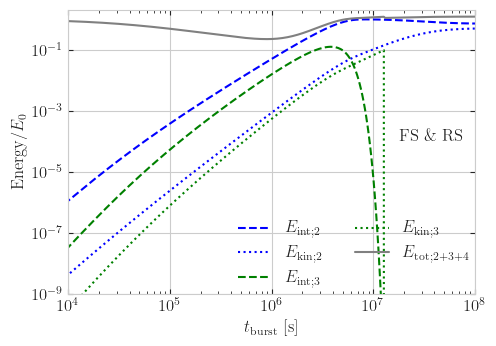

In [6]:
paper_plot_compare_fsrs(plot_rs=True, figname="abstract_tophat_fsrs_energy", text="FS \& RS", ylim=(1e-9,2))

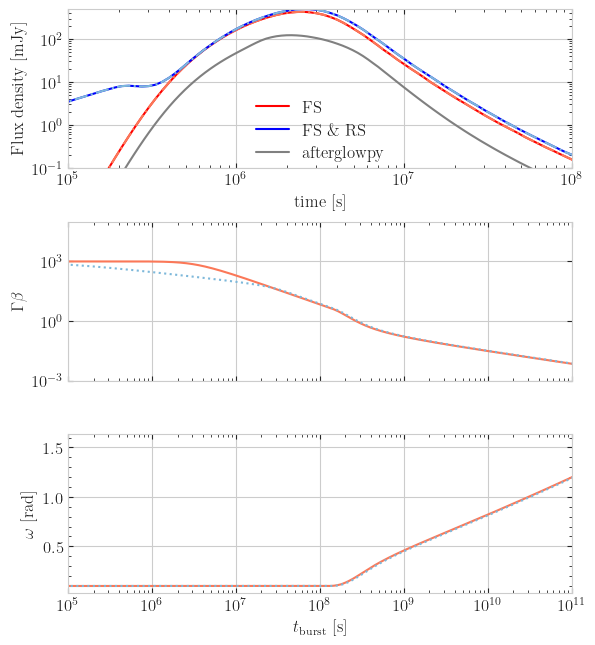

In [4]:
def paper_plot_compare_fsrs():

    tsk = SettingsTopHat()
    tsk.pars["theta_obs"] = 0.9
    
    fig, axes = plt.subplots(figsize=(6,6.5), ncols=1, nrows=3)
    
    grbrs.paper_plot_compare_fsrs(axes,
        pars=tsk.pars_fsrs, opts=tsk.opts_fsrs, opts_grb=tsk.opts_a_fsrs,
        struct=tsk.structure
    )
    clear_output(wait=False)

    # plot
    ax = axes[0]
    # ax.grid()
    ax.legend(fancybox=True, loc='lower center',
              # bbox_to_anchor=(0.5, 0.5),  # loc=(0.0, 0.6),  # (1.0, 0.3), # <-> |
              shadow=False, ncol=1, fontsize=12,
              framealpha=0., borderaxespad=0.)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel("time [s]", fontsize=12)
    ax.set_ylabel("Flux density [mJy]", fontsize=12)
    # ax.set_title(title)
    ax.set_xlim(1e5,1e8)
    ax.set_ylim(1e-1,5e2)
    # ax.grid()
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', labelleft=True,
                   labelright=False, tick1On=True, tick2On=True,
                   labelsize=12,
                   direction='in',
                   bottom=True, top=True, left=True, right=True)
    # ax.set_facecolor("pink")

    ax = axes[1]
    # ax.grid()
    # ax.legend()
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_ylabel(r"$\Gamma\beta$", fontsize=12)
    ax.set_xlim(1e5,1e11)
    ax.set_ylim(1e-3,1e5)
    ax.tick_params(axis='both', which='both', labelleft=True,
                   labelright=False, tick1On=True, tick2On=True,
                   labelsize=12,
                   direction='in',
                   bottom=True, top=True, left=True, right=True)
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.minorticks_on()
    # ax.set_facecolor("pink")

    ax = axes[2]
    # ax.grid()
    # ax.legend()
    ax.set_xscale("log")
    ax.set_yscale("linear")
    ax.set_ylabel(r"$\omega$ [rad]", fontsize=12)
    ax.set_xlabel(r"$t_{\rm burst}$ [s]", fontsize=12)
    ax.set_xlim(1e5,1e11)
    ax.tick_params(axis='both', which='both', labelleft=True,
                   labelright=False, tick1On=True, tick2On=True,
                   labelsize=12,
                   direction='in',
                   bottom=True, top=True, left=True, right=True)
    ax.minorticks_on()
    # ax.set_facecolor("pink")

    plt.tight_layout()
    # print("Saving:\n {}".format(paperfigdir+"abstract_spread_lcs_dyn.pdf"))
    # plt.savefig(paperfigdir+"abstract_spread_lcs_dyn.pdf")
    # plt.savefig(paperfigdir+"abstract_gaus_spread_lcs_dyn.png", dpi=256)
    # plt.show()
    figname = "abstract_tophat_fsrs_lcs_dyn"
    plt.savefig(pdfs+figname+".pdf")
    plt.savefig(pdfs+figname+".png", dpi=256)
    plt.show()
paper_plot_compare_fsrs()    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


SedL = 7.35e+16
Delta0 = 3.00e+13
xi = 2.465110e-02
THICK SHELL, Tx = 1.000000e+03
ZK07 cross time 1.0442816963144996e+16 1639592100205987.8 293643.9736232126


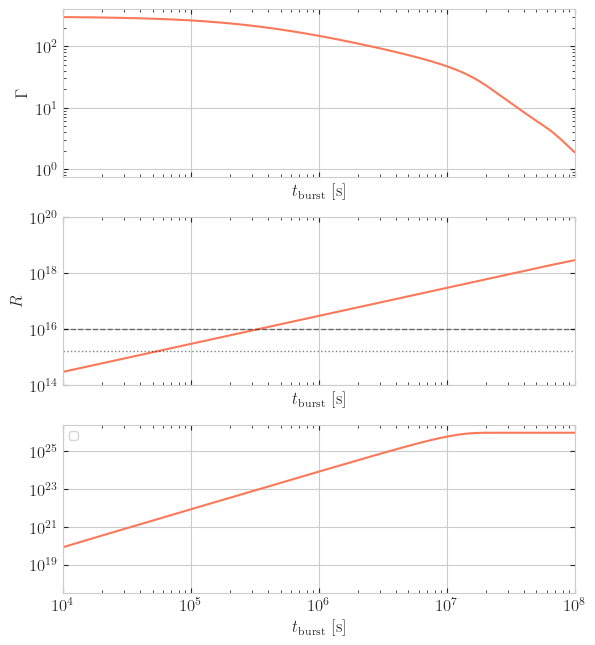

In [5]:
def paper_plot_compare_fsrs():
    mp = 1.6726231e-24
    c = 299792458e2
    
    tsk = copy.deepcopy( SettingsTopHat() )
    tsk.pars["theta_obs"] = 0.9
    tsk.structure["Eiso_c"] = 1e52
    tsk.structure["Gamma0c"] = gam4 =300.

    bb = Base(default_parfile_fpath=curdir+"parfile_def.par", workingdir=curdir+"output/")
    opts_ = copy.deepcopy(tsk.opts_fsrs)
    opts_["bw_type"] = "fsrs"
    opts_["do_rs"] = "yes"
    opts_["fname_dyn"] = f"dyn_a_fsrs.h5"
    opts_["fname_sky_map"] = f"skymap_a_fsrs.h5"
    opts_["fname_light_curve"] = f"lc_a_fsrs.h5"
    opts_["fname_light_curve_layers"] = f"lc_a_fsrs_layers.h5"
    pba_a = bb.run_a(struct=tsk.structure, pars=tsk.pars_fsrs, opts={}, opts_grb=opts_)   
    clear_output(wait=False)

    E0 = float(pba_a.GRB.get_dyn_obj()["shell=0 layer=0"].attrs["E0"])
    t0 = float(pba_a.GRB.get_dyn_obj()["shell=0 layer=0"].attrs["E0"])
    SedL = ((3-tsk.pars["s"])*E0/(4*np.pi*tsk.pars["n_ism"]*mp*c**2))**(1./(3-tsk.pars["s"]))
    
    print(f"SedL = {SedL:.2e}")
    
    Delt0 = pba_a.GRB.pars["tprompt"] * c
    print(f"Delta0 = {Delt0:.2e}")
    
    xi = np.sqrt(SedL/Delt0)*gam4**(-(4.-tsk.pars["s"])/(3-tsk.pars["s"])) # Gao 2015
    print('xi = %e' % xi)

    ttw = Delt0/c   # RRS Crossing Time for Thick shell #Gao 2015
    #ttw = SedL/(2*gam4**(8/3)) # NRS Crossing Time
    #ttn = SedL/(2*c*gam4**(3./8))  #Crossing Time for Thin shell
    # ttn = SedL/(2**(2./3)*c*gam4**(8./3)) # Qiang Chen choose this equation
    ttn = SedL/(2**(tsk.pars["s"]-2)*c**(tsk.pars["s"]-3)*gam4**(2*tsk.pars["s"]-8)) # Gao 2015
    
    #if Delt0 > SedL/(gam4**(8./3)):
    if xi < 1.0:
        txd = ttw
        print('THICK SHELL, Tx = %e' % ttw)
    else:
        txd = ttn
        print('THIN SHELL, Tx = %e' % ttn)
    Rcross = SedL**(3./4)*Delt0**(1./4)
    Rdec = SedL/(gam4**(2./3))
    print('ZK07 cross time',Rcross, Rdec, (Rcross-Rdec)/c)


    fig, axes = plt.subplots(figsize=(6,6.5), ncols=1, nrows=3, sharex="all")
    
    bb.plot_dyn(axes[0], pba=pba_a, v_n_x="tburst", v_n_y="Gamma", layers=(),
                plot_layer={"ls":'-', "cmap":"Reds", "alpha":1, "vmin":-50, "vmax":60})
    bb.plot_dyn(axes[1], pba=pba_a, v_n_x="tburst", v_n_y="R", layers=(),
                plot_layer={"ls":'-', "cmap":"Reds", "alpha":1, "vmin":-50, "vmax":60})
    bb.plot_dyn(axes[2], pba=pba_a, v_n_x="tburst", v_n_y="M3", layers=(),
                plot_layer={"ls":'-', "cmap":"Reds", "alpha":1, "vmin":-50, "vmax":60})

    # ax.grid()
    # ax.legend()
    for ax in axes:
        ax.set_xscale("log")
        ax.set_yscale("log")
        ax.tick_params(axis='both', which='both', labelleft=True,
                       labelright=False, tick1On=True, tick2On=True,
                       labelsize=12,
                       direction='in',
                       bottom=True, top=True, left=True, right=True)
        # ax.xaxis.set_tick_params(labelbottom=False)
        ax.minorticks_on()
        ax.set_xlabel(r"$t_{\rm burst}$ [s]", fontsize=12)
        ax.set_xlim(1e4,1e8)
        
    axes[0].set_ylabel(r"$\Gamma$", fontsize=12)
    axes[1].set_ylabel(r"$R$", fontsize=12)
    # ax.set_xlim(1e4,1e8)
    axes[1].set_ylim(1e14,1e20)

    axes[0].axvline(x=txd, color ='k', linewidth=1, linestyle="--",alpha=0.5)

    # ax.set_facecolor("pink")
    axes[1].axhline(y=Rdec, color='k', lw=1, linestyle=':',alpha=0.5, label="Rdec")
    axes[1].axhline(y=Rcross, color='k', lw=1, linestyle='--',alpha=0.5, label="Rcross")
    
    plt.legend()
    plt.tight_layout()
    # print("Saving:\n {}".format(paperfigdir+"abstract_spread_lcs_dyn.pdf"))
    # plt.savefig(paperfigdir+"abstract_spread_lcs_dyn.pdf")
    # plt.savefig(paperfigdir+"abstract_gaus_spread_lcs_dyn.png", dpi=256)
    # plt.show()
    
    figname = "abstract_tophat_fsrs_lcs_dyn"
    plt.savefig(pdfs+figname+".pdf")
    plt.savefig(pdfs+figname+".png", dpi=256)
    plt.show()
paper_plot_compare_fsrs()

In [5]:
# Top hat grb does not have resolution
def paper_plot_resolution_rs():

    tsk = SettingsTopHat()
    tsk.pars["theta_obs"] = 0.9 
    
    fig, ax = plt.subplots(figsize=(4.6,3.5), ncols=1, nrows=1)
    grbrs.paper_plot_resolution_rs(ax=ax,struct=tsk.structure, pars=tsk.pars_fsrs, opts_a=tsk.opts_a_fsrs, layers=(),
                                   resolutions_a=tsk.resolutions_a)
    clear_output(wait=False)
    
    
    ax.legend(fancybox=True, loc='upper left',
              # bbox_to_anchor=(0.5, 0.5),  # loc=(0.0, 0.6),  # (1.0, 0.3), # <-> |
              shadow=False, ncol=1, fontsize=12,
              framealpha=0., borderaxespad=0.)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel("time [s]", fontsize=12)
    ax.set_ylabel("Flux density [mJy]", fontsize=12)
    # ax.set_title(title)
    ax.set_xlim(1e5,1e8)
    ax.set_ylim(1e-2,2e2)
    # ax.grid()
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', labelleft=True,
                   labelright=False, tick1On=True, tick2On=True,
                   labelsize=12,
                   direction='in',
                   bottom=True, top=True, left=True, right=True)
    ax.minorticks_on()
    # ax.set_facecolor("pink")
    # ax.set_facecolor("gray")
    plt.tight_layout()

    figname = "abstract_fsrs_resolution_lcs"
    plt.savefig(pdfs+figname+".pdf")
    plt.savefig(pdfs+figname+".png", dpi=256)
    plt.show()
# paper_plot_resolution_rs()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


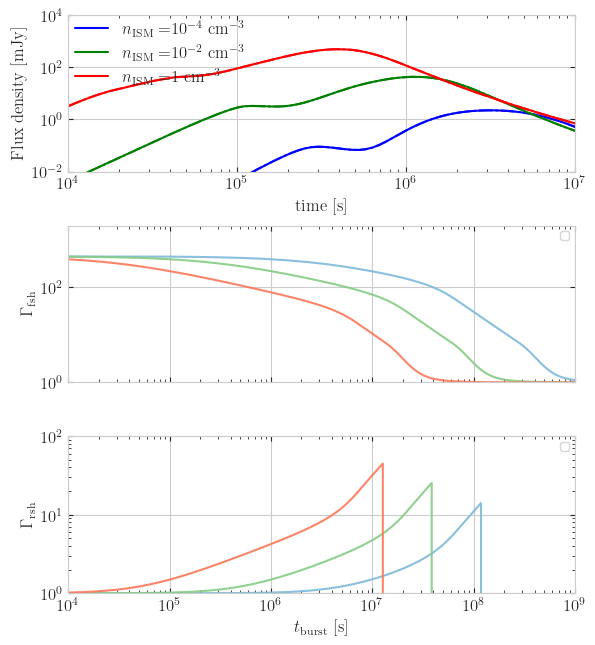

In [7]:
def compare_grbs():
    tsk = SettingsTopHat()
    tsk.pars["theta_obs"] = 0.9
    
    fig, axes = plt.subplots(figsize=(6,6.5), ncols=1, nrows=3)
    grbrs.compare_grbs(
        axes, 
        struct=tsk.structure, 
        pars=tsk.pars_fsrs, 
        opts_a=tsk.opts_a, 
        opts_a_grb=tsk.opts_a_fsrs, 
        layers=(0,10,20,30,40,49),
        setups = (
            {"n_ism":1.e-4,"color":"blue","cmap":"Blues","label":r"$n_{\rm ISM}=$"+"$10^{-4}$ cm$^{-3}$"},
            {"n_ism":1.e-2,"color":"green","cmap":"Greens","label":r"$n_{\rm ISM}=$"+"$10^{-2}$ cm$^{-3}$"},
            {"n_ism":1.,"color":"red","cmap":"Reds","label":r"$n_{\rm ISM}=$"+"$1$ cm$^{-3}$"}
        )
    )
    clear_output(wait=False)
    
    
    # plot
    ax = axes[0]
    # ax.grid()
    ax.legend(fancybox=True, loc='upper left',
              # bbox_to_anchor=(0.5, 0.5),  # loc=(0.0, 0.6),  # (1.0, 0.3), # <-> |
              shadow=False, ncol=1, fontsize=12,
              framealpha=0., borderaxespad=0.)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel("time [s]", fontsize=12)
    ax.set_ylabel("Flux density [mJy]", fontsize=12)
    # ax.set_title(title)
    ax.set_xlim(1e4,1e7)
    ax.set_ylim(1e-2,1e4)
    # ax.grid()
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', labelleft=True,
                   labelright=False, tick1On=True, tick2On=True,
                   labelsize=12,
                   direction='in',
                   bottom=True, top=True, left=True, right=True)
    # ax.set_facecolor("pink")

    ax = axes[1]
    # ax.grid()
    ax.legend()
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_ylabel(r"$\Gamma_{\rm fsh}$", fontsize=12)
    ax.set_xlim(1e4,1e9)
    ax.set_ylim(1e0,2e3)
    ax.tick_params(axis='both', which='both', labelleft=True,
                   labelright=False, tick1On=True, tick2On=True,
                   labelsize=12,
                   direction='in',
                   bottom=True, top=True, left=True, right=True)
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.minorticks_on()
    # ax.set_facecolor("pink")

    ax = axes[2]
    # ax.grid()
    ax.legend()
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_ylabel(r"$\Gamma_{\rm rsh}$", fontsize=12)
    ax.set_xlabel(r"$t_{\rm burst}$ [s]", fontsize=12)
    ax.set_xlim(1.e4,1e9)
    ax.set_ylim(1.e0,100.)
    ax.tick_params(axis='both', which='both', labelleft=True,
                   labelright=False, tick1On=True, tick2On=True,
                   labelsize=12,
                   direction='in',
                   bottom=True, top=True, left=True, right=True)
    ax.minorticks_on()
    # ax.set_facecolor("pink")

    plt.tight_layout()
    figname = "abstract_fsrs_resolution_lcs"
    plt.savefig(pdfs+figname+".pdf")
    plt.savefig(pdfs+figname+".png", dpi=256)
    plt.show()
compare_grbs()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


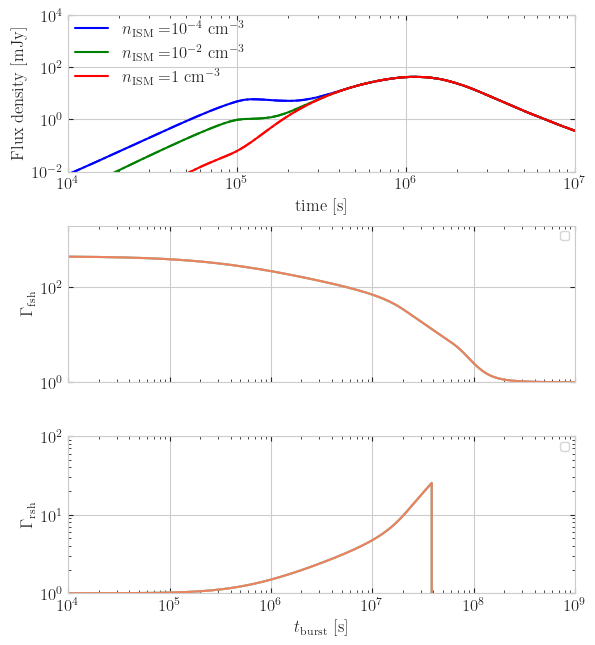

In [14]:
def compare_grbs():
    tsk = SettingsTopHat()
    tsk.pars["theta_obs"] = 0.9
    
    fig, axes = plt.subplots(figsize=(6,6.5), ncols=1, nrows=3)
    grbrs.compare_grbs(
        axes,
        struct=tsk.structure,
        pars=tsk.pars_fsrs,
        opts_a=tsk.opts_a,
        opts_a_grb=tsk.opts_a_fsrs,
        layers=(0,10,20,30,40,49),
        setups = (
            {"eps_b_rs":1e-1,"color":"blue","cmap":"Blues","label":r"$n_{\rm ISM}=$"+"$10^{-4}$ cm$^{-3}$"},
            {"eps_b_rs":1e-3,"color":"green","cmap":"Greens","label":r"$n_{\rm ISM}=$"+"$10^{-2}$ cm$^{-3}$"},
            {"eps_b_rs":1e-6,"color":"red","cmap":"Reds","label":r"$n_{\rm ISM}=$"+"$1$ cm$^{-3}$"}
        )
    )
    clear_output(wait=False)


    # plot
    ax = axes[0]
    # ax.grid()
    ax.legend(fancybox=True, loc='upper left',
              # bbox_to_anchor=(0.5, 0.5),  # loc=(0.0, 0.6),  # (1.0, 0.3), # <-> |
              shadow=False, ncol=1, fontsize=12,
              framealpha=0., borderaxespad=0.)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel("time [s]", fontsize=12)
    ax.set_ylabel("Flux density [mJy]", fontsize=12)
    # ax.set_title(title)
    ax.set_xlim(1e4,1e7)
    ax.set_ylim(1e-2,1e4)
    # ax.grid()
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', labelleft=True,
                   labelright=False, tick1On=True, tick2On=True,
                   labelsize=12,
                   direction='in',
                   bottom=True, top=True, left=True, right=True)
    # ax.set_facecolor("pink")

    ax = axes[1]
    # ax.grid()
    ax.legend()
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_ylabel(r"$\Gamma_{\rm fsh}$", fontsize=12)
    ax.set_xlim(1e4,1e9)
    ax.set_ylim(1e0,2e3)
    ax.tick_params(axis='both', which='both', labelleft=True,
                   labelright=False, tick1On=True, tick2On=True,
                   labelsize=12,
                   direction='in',
                   bottom=True, top=True, left=True, right=True)
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.minorticks_on()
    # ax.set_facecolor("pink")

    ax = axes[2]
    # ax.grid()
    ax.legend()
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_ylabel(r"$\Gamma_{\rm rsh}$", fontsize=12)
    ax.set_xlabel(r"$t_{\rm burst}$ [s]", fontsize=12)
    ax.set_xlim(1.e4,1e9)
    ax.set_ylim(1.e0,100.)
    ax.tick_params(axis='both', which='both', labelleft=True,
                   labelright=False, tick1On=True, tick2On=True,
                   labelsize=12,
                   direction='in',
                   bottom=True, top=True, left=True, right=True)
    ax.minorticks_on()
    # ax.set_facecolor("pink")

    plt.tight_layout()
    figname = "abstract_fsrs_resolution_lcs"
    plt.savefig(pdfs+figname+".pdf")
    plt.savefig(pdfs+figname+".png", dpi=256)
    plt.show()
compare_grbs()